<a href="https://www.kaggle.com/code/lonnieqin/fast-style-transfer?scriptVersionId=114124152" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Fast Style Transfer

## Summary
In this notebook, I am going to use Fast Style Transfer from TFHub to generate monet-styled images. It can generate 7000 images in about 350 seconds, which takes 0.05 second per image.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import time
import os
from PIL import Image
import shutil

## Common Parameters

In [2]:
base_path = "/kaggle/input/gan-getting-started"
content_path = os.path.join(base_path, "photo_jpg")
style_path = os.path.join(base_path, "monet_jpg")
output_path = "/kaggle/working/images"
image_size = 256
num_outputs = 7000

## Common Functions

In [3]:
def sample(photos, count):
    photos = photos[np.random.choice(len(photos), count)]
    for photo in photos:
        img = tf.keras.preprocessing.image.load_img(photo)
        plt.imshow(img)
        plt.show()

## Import Datasets

In [4]:
style_images = np.array([os.path.join(style_path, path) for path in os.listdir(style_path)])
np.random.shuffle(style_images)
print(style_images[:10])

['/kaggle/input/gan-getting-started/monet_jpg/8c48e112d0.jpg'
 '/kaggle/input/gan-getting-started/monet_jpg/3417ace946.jpg'
 '/kaggle/input/gan-getting-started/monet_jpg/d754850d01.jpg'
 '/kaggle/input/gan-getting-started/monet_jpg/4f3f4ff590.jpg'
 '/kaggle/input/gan-getting-started/monet_jpg/32cc820303.jpg'
 '/kaggle/input/gan-getting-started/monet_jpg/70bc945f95.jpg'
 '/kaggle/input/gan-getting-started/monet_jpg/fb3b06dcb2.jpg'
 '/kaggle/input/gan-getting-started/monet_jpg/6043aadea0.jpg'
 '/kaggle/input/gan-getting-started/monet_jpg/fb93438ff9.jpg'
 '/kaggle/input/gan-getting-started/monet_jpg/61e735361a.jpg']


In [5]:
content_images = np.array([os.path.join(content_path, path) for path in os.listdir(content_path)])
np.random.shuffle(content_images)
print(content_images[:10])

['/kaggle/input/gan-getting-started/photo_jpg/e67341c640.jpg'
 '/kaggle/input/gan-getting-started/photo_jpg/c7608e5539.jpg'
 '/kaggle/input/gan-getting-started/photo_jpg/fb1779d922.jpg'
 '/kaggle/input/gan-getting-started/photo_jpg/504db35d13.jpg'
 '/kaggle/input/gan-getting-started/photo_jpg/c8bd9caef0.jpg'
 '/kaggle/input/gan-getting-started/photo_jpg/49dc3fd195.jpg'
 '/kaggle/input/gan-getting-started/photo_jpg/875b07f673.jpg'
 '/kaggle/input/gan-getting-started/photo_jpg/3a36ff8b4b.jpg'
 '/kaggle/input/gan-getting-started/photo_jpg/4fc90f8de5.jpg'
 '/kaggle/input/gan-getting-started/photo_jpg/c97cfcba7e.jpg']


## Exploratory Data Analysis

**Number of style images**

In [6]:
len(style_images)

300

**Number of content images**

In [7]:
len(content_images)

7038

**Style Images**

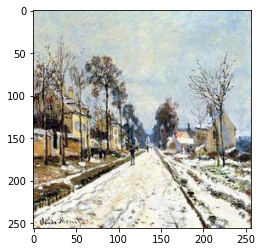

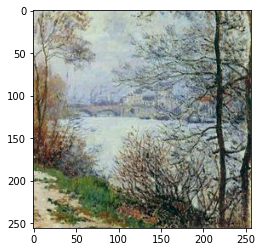

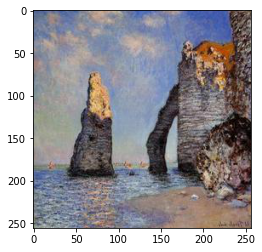

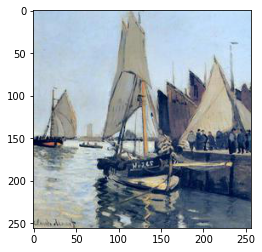

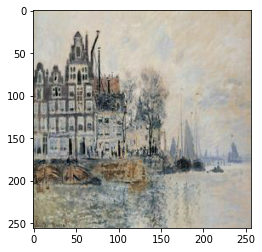

In [8]:
sample(style_images, 5)

**Content Images**

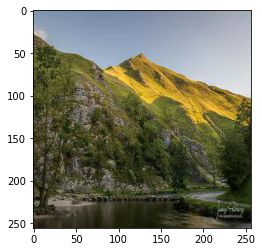

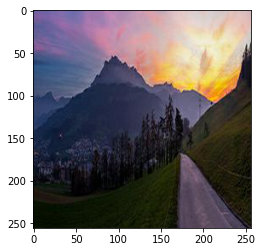

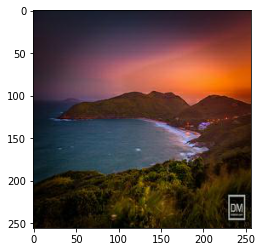

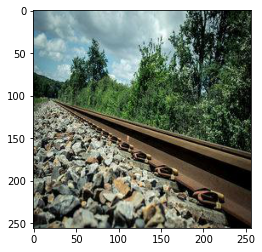

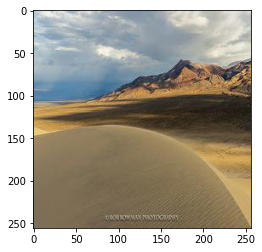

In [9]:
sample(content_images, 5)

## Load Pretrained Model

In [10]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Generating outputs

In [11]:
%rm -r -f /kaggle/working/images

In [12]:
%mkdir /kaggle/working/images

In [13]:
from tqdm import tqdm
for i in tqdm(range(num_outputs)):
    content_image_path = content_images[np.random.randint(len(content_images))]
    style_image_path = style_images[np.random.randint(len(style_images))]
    content_image = plt.imread(content_image_path)
    style_image = plt.imread(style_image_path)
    content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
    style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
    style_image = tf.image.resize(style_image, (image_size, image_size))
    outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
    stylized_image = tf.reshape(outputs[0], (image_size, image_size, 3))
    file_path = os.path.join(output_path, str(i + 1) + ".jpg")
    img = Image.fromarray(np.uint8(stylized_image * 255.0))
    img.save(file_path)

100%|██████████| 7000/7000 [05:12<00:00, 22.43it/s]


In [14]:
shutil.make_archive(output_path, 'zip', output_path)

'/kaggle/working/images.zip'

## Visualize outputs

In [15]:
output_images = np.array([os.path.join(output_path, path) for path in os.listdir(output_path)])

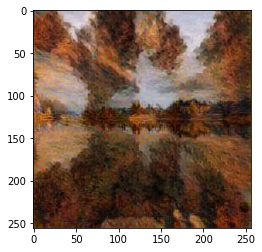

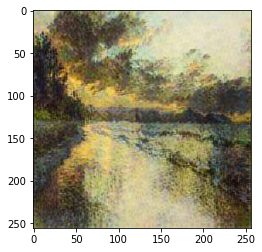

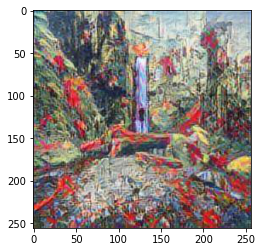

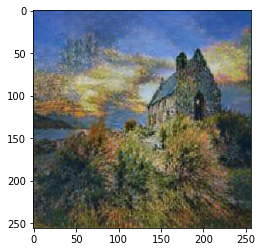

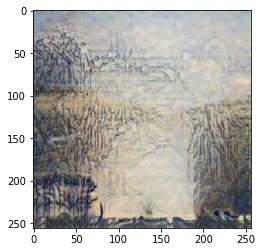

In [16]:
sample(output_images, 5)

## If this notebook is helpful, please give me an upvote, thank you.